<a href="https://colab.research.google.com/github/rahiakela/audio-processing-research-and-practice/blob/main/huggingface-audio-course/unit-02-audio-application/hands_on_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

**Reference**:

[Hands-on exercise](https://huggingface.co/learn/audio-course/chapter2/hands_on)

In [ ]:
!pip install transformers
!pip install datasets[audio]

In [2]:
from datasets import load_dataset
from datasets import Audio

from transformers import WhisperFeatureExtractor
from transformers import AutoProcessor

import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

##Dataset

In [4]:
voxpopuli_croatian = load_dataset("facebook/voxpopuli", name="en_accented", streaming=True)
voxpopuli_croatian

{'test': <datasets.iterable_dataset.IterableDataset at 0x782c69779480>}

In [11]:
next(iter(voxpopuli_croatian["test"]))

{'audio_id': '20111116-0900-PLENARY-8-en_20111116-16:02:33_0',
 'language': 16,
 'audio': {'path': 'test_part_0/20111116-0900-PLENARY-8-en_20111116-16:02:33_0.wav',
  'array': array([-0.01571655, -0.00256348,  0.00823975, ..., -0.00466919,
         -0.00466919, -0.00241089]),
  'sampling_rate': 16000},
 'raw_text': 'President are the relations of the European union with the United States of America among the most important stabilizing factors that',
 'normalized_text': 'president are the relations of the european union with the united states of america among the most important stabilizing factors that',
 'gender': 'na',
 'speaker_id': '33997',
 'is_gold_transcript': True,
 'accent': 'en_ro'}

In [12]:
voxpopuli_croatian_head = voxpopuli_croatian["test"].take(3)
list(voxpopuli_croatian_head)

[{'audio_id': '20111116-0900-PLENARY-8-en_20111116-16:02:33_0',
  'language': 16,
  'audio': {'path': 'test_part_0/20111116-0900-PLENARY-8-en_20111116-16:02:33_0.wav',
   'array': array([-0.01571655, -0.00256348,  0.00823975, ..., -0.00466919,
          -0.00466919, -0.00241089]),
   'sampling_rate': 16000},
  'raw_text': 'President are the relations of the European union with the United States of America among the most important stabilizing factors that',
  'normalized_text': 'president are the relations of the european union with the united states of america among the most important stabilizing factors that',
  'gender': 'na',
  'speaker_id': '33997',
  'is_gold_transcript': True,
  'accent': 'en_ro'},
 {'audio_id': '20140204-0900-PLENARY-13-en_20140204-16:05:43_1',
  'language': 16,
  'audio': {'path': 'test_part_0/20140204-0900-PLENARY-13-en_20140204-16:05:43_1.wav',
   'array': array([-0.10546875, -0.10955811, -0.11694336, ...,  0.21987915,
           0.21127319,  0.18862915]),
  

In [16]:
example = next(iter(voxpopuli_croatian["test"]))
example

{'audio_id': '20111116-0900-PLENARY-8-en_20111116-16:02:33_0',
 'language': 16,
 'audio': {'path': 'test_part_0/20111116-0900-PLENARY-8-en_20111116-16:02:33_0.wav',
  'array': array([-0.01571655, -0.00256348,  0.00823975, ..., -0.00466919,
         -0.00466919, -0.00241089]),
  'sampling_rate': 16000},
 'raw_text': 'President are the relations of the European union with the United States of America among the most important stabilizing factors that',
 'normalized_text': 'president are the relations of the european union with the united states of america among the most important stabilizing factors that',
 'gender': 'na',
 'speaker_id': '33997',
 'is_gold_transcript': True,
 'accent': 'en_ro'}

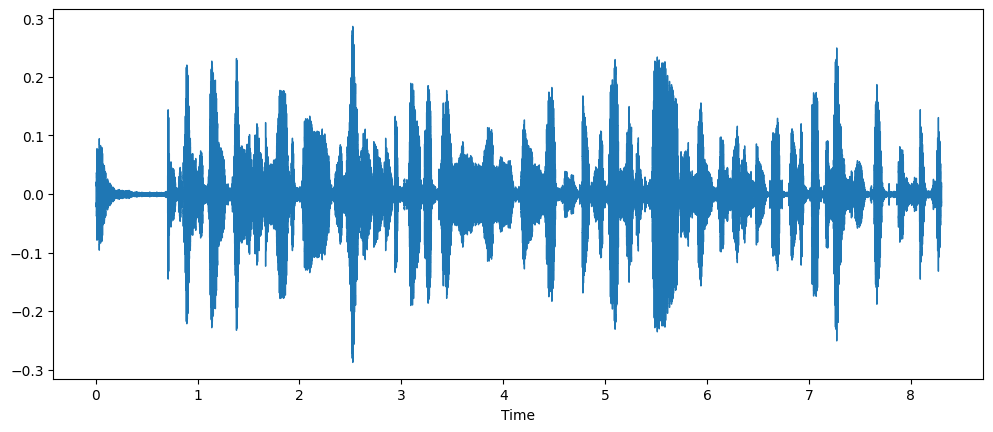

In [17]:
# Let’s plot the waveform for the first example
array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

In [ ]:
# Let’s load the feature extractor from the pre-trained Whisper checkpoint
feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")

In [19]:
def prepare_dataset(example):
  audio = example["audio"]
  features = feature_extractor(audio["array"], sampling_rate=audio["sampling_rate"], padding=True)
  return features

In [21]:
# let's apply the data preparation function to all of our training examples
voxpopuli_croatians = voxpopuli_croatian_head.map(prepare_dataset)
voxpopuli_croatians

In [24]:
example = list(voxpopuli_croatians)[0]
example

{'audio_id': '20111116-0900-PLENARY-8-en_20111116-16:02:33_0',
 'language': 16,
 'audio': {'path': 'test_part_0/20111116-0900-PLENARY-8-en_20111116-16:02:33_0.wav',
  'array': array([-0.01571655, -0.00256348,  0.00823975, ..., -0.00466919,
         -0.00466919, -0.00241089]),
  'sampling_rate': 16000},
 'raw_text': 'President are the relations of the European union with the United States of America among the most important stabilizing factors that',
 'normalized_text': 'president are the relations of the european union with the united states of america among the most important stabilizing factors that',
 'gender': 'na',
 'speaker_id': '33997',
 'is_gold_transcript': True,
 'accent': 'en_ro',
 'input_features': [array([[ 0.37759316, -0.03012609,  0.137268  , ...,  0.18260759,
           0.07251835, -0.18336368],
         [ 0.3776468 ,  0.00501055,  0.24497038, ...,  0.1710478 ,
           0.22330052,  0.10107034],
         [ 0.4052118 ,  0.1984868 ,  0.30305576, ...,  0.45379406,
      

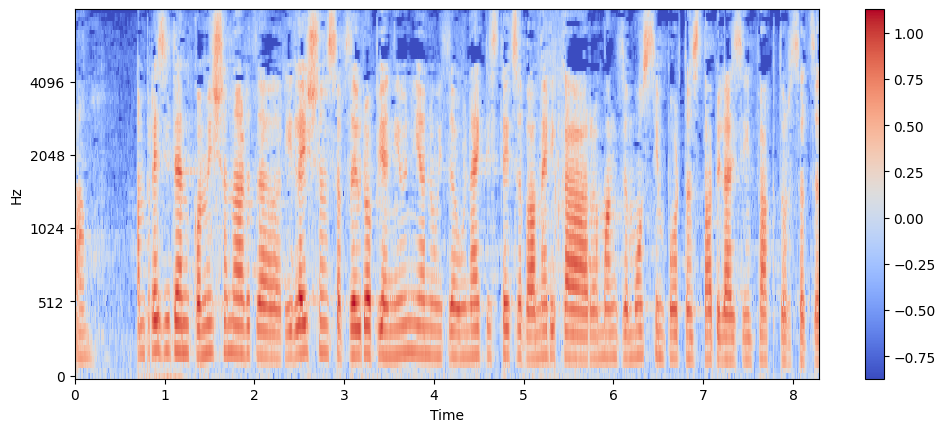

In [25]:
# let’s visualize it for one of the examples in the minds dataset
input_features = example["input_features"]

plt.figure().set_figwidth(12)
librosa.display.specshow(
    np.asarray(input_features[0]),
    x_axis="time",
    y_axis="mel",
    sr=feature_extractor.sampling_rate,
    hop_length=feature_extractor.hop_length
)
plt.colorbar()

##Automatic speech recognition